In [4]:
# ## Download packages
# !pip install keras-vggface
# !pip install opencv-python
# !pip install tensorflow
# !pip install shutil
# !pip install matplotlib
# !pip install sklearn
# !pip install keras-applications
# !pip install tensorflow-gpu

You should consider upgrading via the 'd:\coding\python\misc\venv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'd:\coding\python\misc\venv\scripts\python.exe -m pip install --upgrade pip' command.


  Using cached tensorflow-2.5.0-cp39-cp39-win_amd64.whl (422.6 MB)


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'd:\\coding\\python\\misc\\venv\\Lib\\site-packages\\tensorflow\\lite\\experimental\\microfrontend\\python\\ops\\_audio_microfrontend_op.so'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'd:\coding\python\misc\venv\scripts\python.exe -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement shutil (from versions: none)
ERROR: No matching distribution found for shutil
You should consider upgrading via the 'd:\coding\python\misc\venv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'd:\coding\python\misc\venv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'd:\coding\python\misc\venv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'd:\coding\python\misc\venv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'd:\coding\python\misc\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math
import copy
import numpy as np

from keras.models import Sequential, Model
from keras.layers import Input, Dense, Flatten, Dropout, Activation, Lambda, Permute, Reshape
from keras.layers import Convolution2D, ZeroPadding2D, MaxPooling2D
from keras_vggface.vggface import VGGFace
from keras_vggface import utils
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
import pandas as pd
import cv2
import scipy.misc
import matplotlib.pyplot as plt
from tqdm import tqdm

In [34]:
import os

base_path = os.getcwd()

train_location = os.path.join(base_path, 'train')
val_location = os.path.join(base_path, 'val')

train_fake_image_location = os.path.join(train_location, 'fake_image')
train_real_image_location = os.path.join(train_location, 'real_image')
val_fake_image_location = os.path.join(val_location, 'fake_image')
val_real_image_location = os.path.join(val_location, 'real_image')

SHAPE=500

In [35]:
import shutil
import os
def squash_and_merge(directory):
    count = 0
    folders = os.listdir(directory)
    for f in folders :
        files = os.listdir(os.path.join(directory, f))
        for f_x in files :
            original = os.path.join(directory, f, f_x)
            target = os.path.join(directory, f'{count}.jpg')
            count += 1
            shutil.move(original, target)
        shutil.rmtree(os.path.join(directory, f))

In [36]:
# squash_and_merge(train_fake_image_location)
# squash_and_merge(train_real_image_location)
# squash_and_merge(val_fake_image_location)
# squash_and_merge(val_real_image_location)

In [37]:
train_new_location = os.path.join(base_path, 'train_1')
val_new_location = os.path.join(base_path, 'val_1')
try :
    shutil.copytree(train_fake_image_location,os.path.join(train_new_location, 'fake'))
    shutil.copytree(train_real_image_location,os.path.join(train_new_location, 'real'))
    shutil.copytree(val_fake_image_location,os.path.join(val_new_location, 'fake'))
    shutil.copytree(val_real_image_location,os.path.join(val_new_location, 'real'))
except FileExistsError:
    pass
finally :
    print('Copied')

Copied


Found 66722 images belonging to 2 classes.
Found 12592 images belonging to 2 classes.


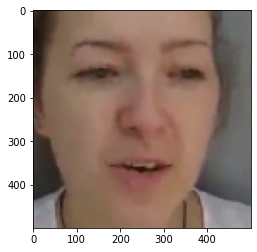

In [39]:
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
train_datagen = ImageDataGenerator(rescale=1./255,
        horizontal_flip=True,brightness_range=[0.7,1.0])
val_datagen = ImageDataGenerator(rescale=1./255.)
batch_size = 32

train_flow = train_datagen.flow_from_directory(
    train_new_location,
    target_size=(SHAPE, SHAPE),
    batch_size=batch_size,
    class_mode='binary'
)

valid_flow = val_datagen.flow_from_directory(
    val_new_location,
    target_size=(SHAPE, SHAPE),
    batch_size=batch_size,
    class_mode='binary'
)

batch = train_flow.next()
image = batch[0][0]
plt.imshow(image)
plt.show()
    
# show the figure


In [40]:
train_flow.class_indices

{'fake': 0, 'real': 1}

In [41]:
valid_flow.class_indices

{'fake': 0, 'real': 1}

In [42]:
"""
Plot the training and validation loss
epochs - list of epoch numbers
loss - training loss for each epoch
val_loss - validation loss for each epoch
"""
def plot_loss(epochs, loss, val_loss):
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'orange', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
    
    
"""
Plot the training and validation accuracy
epochs - list of epoch numbers
acc - training accuracy for each epoch
val_acc - validation accuracy for each epoch
"""
def plot_accuracy(epochs, acc, val_acc):
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'orange', label = 'Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

In [43]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
"""
    Propsoed CNN architecture.
    
"""

model = Sequential()

# Pamameters Initialization
input_shape = (SHAPE,SHAPE,3)
activation = 'relu'
padding = 'same'
droprate = 0.3
epsilon=0.001

model = Sequential()
model.add(BatchNormalization(input_shape=input_shape))
model.add(Conv2D(filters=16, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))


model.add(Conv2D(filters=32, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=64, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=128, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=256, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

# model.add(Conv2D(filters=512, kernel_size=3, activation=activation, padding=padding))
# model.add(MaxPooling2D(pool_size=2))
# model.add(BatchNormalization(epsilon=epsilon))
# model.add(Dropout(droprate))

model.add(GlobalAveragePooling2D())
#model.add(Flatten())
#model.add(Dense(256, kernel_initializer='glorot_normal', activation='relu'))
#model.add(Dropout(0.5))
          
#model.add(Dense(128, kernel_initializer='glorot_normal', activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dropout(droprate))
model.add(Dense(1, activation='sigmoid'))

model.summary() # Summary of the architecture

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 500, 500, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 500, 500, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 250, 250, 16)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 250, 250, 16)      64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 250, 250, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 125, 125, 32)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 125, 125, 32)     

In [44]:
# Parameters Initialization
from keras.optimizers import SGD,Adam,Adadelta


model.compile(loss='binary_crossentropy',optimizer=Adam(0.0001), metrics=['accuracy'])

In [46]:
train_steps = 66722//batch_size
valid_steps = 12592//batch_size

history = model.fit_generator(
    train_flow,
    epochs=5,
    steps_per_epoch = train_steps,
    validation_data = valid_flow,
    validation_steps = valid_steps
)

Epoch 1/5
2085/2085 [==============================] - 592s 284ms/step - loss: 0.4871 - accuracy: 0.8035 - val_loss: 0.4925 - val_accuracy: 0.8203
Epoch 2/5
2085/2085 [==============================] - 468s 225ms/step - loss: 0.4490 - accuracy: 0.8166 - val_loss: 0.4513 - val_accuracy: 0.8198
Epoch 3/5
2085/2085 [==============================] - 466s 223ms/step - loss: 0.4433 - accuracy: 0.8172 - val_loss: 0.4442 - val_accuracy: 0.8192
Epoch 4/5
2085/2085 [==============================] - 482s 231ms/step - loss: 0.4371 - accuracy: 0.8190 - val_loss: 0.4470 - val_accuracy: 0.8181
Epoch 5/5
2085/2085 [==============================] - 571s 274ms/step - loss: 0.4331 - accuracy: 0.8198 - val_loss: 0.4442 - val_accuracy: 0.8203


In [47]:
model.save('custom_v2.0.h5')

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

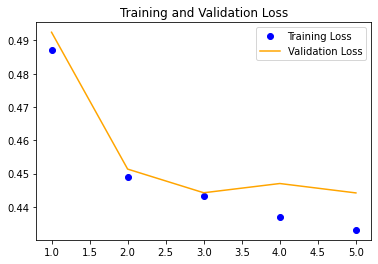

In [49]:
plot_loss(range(1, len(loss) + 1), loss, val_loss)

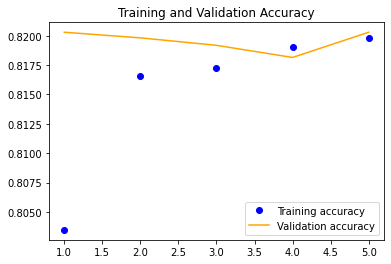

In [50]:
plot_accuracy(range(1, len(loss) + 1), acc, val_acc)

## Evaluation 


In [51]:
from tensorflow import keras
import pandas as pd
model = keras.models.load_model('custom_v1.2.h5')
test_location = os.path.join(base_path, 'test')

df = pd.read_csv(os.path.join(test_location,'image_predictions.csv'))
df

,folder,prediction
0,image/00000,NaN
1,image/00001,NaN
2,image/00002,NaN
3,image/00003,NaN
4,image/00004,NaN
...,...,...
785,image/00785,NaN
786,image/00786,NaN
787,image/00787,NaN
788,image/00788,NaN


In [52]:
def predict(row, base):
    val = row['folder'].split('/')
    test_location = os.path.join(base, val[0], val[1])
    files = os.listdir(test_location)
    try:
        os.mkdir(os.path.join(test_location, 'hello'))
    except FileExistsError:
        pass
    for file in files:
        if (file.endswith('.jpg')):
            try :
                from_location = os.path.join(test_location, file)
                to_location = os.path.join(test_location,'hello', file)
                shutil.copy(from_location, to_location)
            except FileExistsError:
                pass
    new_test_location = os.path.join(test_location)
    test_flow = val_datagen.flow_from_directory(
        test_location,
        target_size=(SHAPE, SHAPE),
        batch_size=1,
        shuffle=False
    )
    res = model.predict(test_flow)
    return np.mean(res)
    

In [53]:
df['prediction'] = df.apply(lambda row : predict(row, test_location), axis=1)

Found 16 images belonging to 1 classes.
Found 13 images belonging to 2 classes.
Found 21 images belonging to 1 classes.
Found 20 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
Found 72 images belonging to 1 classes.
Found 19 images belonging to 1 classes.
Found 17 images belonging to 1 classes.
Found 15 images belonging to 1 classes.
Found 13 images belonging to 1 classes.
Found 20 images belonging to 1 classes.
Found 11 images belonging to 1 classes.
Found 20 images belonging to 1 classes.
Found 14 images belonging to 1 classes.
Found 13 images belonging to 1 classes.
Found 19 images belonging to 1 classes.
Found 11 images belonging to 1 classes.
Found 17 images belonging to 1 classes.
Found 18 images belonging to 1 classes.
Found 13 images belonging to 1 classes.
Found 19 images belonging to 1 classes.
Found 17 images belonging to 1 classes.
Found 25 images belonging to 1 classes.
Found 13 images belonging to 1 classes.
Found 16 images belonging to 1 classes.


Found 10 images belonging to 1 classes.
Found 15 images belonging to 1 classes.
Found 12 images belonging to 1 classes.
Found 12 images belonging to 1 classes.
Found 14 images belonging to 1 classes.
Found 19 images belonging to 1 classes.
Found 17 images belonging to 1 classes.
Found 15 images belonging to 1 classes.
Found 13 images belonging to 1 classes.
Found 11 images belonging to 1 classes.
Found 20 images belonging to 1 classes.
Found 19 images belonging to 1 classes.
Found 11 images belonging to 1 classes.
Found 7 images belonging to 1 classes.
Found 23 images belonging to 1 classes.
Found 19 images belonging to 1 classes.
Found 10 images belonging to 1 classes.
Found 18 images belonging to 1 classes.
Found 11 images belonging to 1 classes.
Found 25 images belonging to 1 classes.
Found 28 images belonging to 1 classes.
Found 12 images belonging to 1 classes.
Found 12 images belonging to 1 classes.
Found 3 images belonging to 1 classes.
Found 18 images belonging to 1 classes.
Fo

Found 16 images belonging to 1 classes.
Found 12 images belonging to 1 classes.
Found 6 images belonging to 1 classes.
Found 6 images belonging to 1 classes.
Found 10 images belonging to 1 classes.
Found 12 images belonging to 1 classes.
Found 13 images belonging to 1 classes.
Found 14 images belonging to 1 classes.
Found 10 images belonging to 1 classes.
Found 16 images belonging to 1 classes.
Found 3 images belonging to 1 classes.
Found 10 images belonging to 1 classes.
Found 19 images belonging to 1 classes.
Found 16 images belonging to 1 classes.
Found 15 images belonging to 1 classes.
Found 45 images belonging to 1 classes.
Found 7 images belonging to 1 classes.
Found 17 images belonging to 1 classes.
Found 13 images belonging to 1 classes.
Found 12 images belonging to 1 classes.
Found 14 images belonging to 1 classes.
Found 14 images belonging to 1 classes.
Found 10 images belonging to 1 classes.
Found 14 images belonging to 1 classes.
Found 11 images belonging to 1 classes.
Foun

Found 20 images belonging to 1 classes.
Found 32 images belonging to 1 classes.
Found 16 images belonging to 1 classes.
Found 10 images belonging to 1 classes.
Found 17 images belonging to 1 classes.
Found 6 images belonging to 1 classes.
Found 34 images belonging to 1 classes.
Found 10 images belonging to 1 classes.
Found 15 images belonging to 1 classes.
Found 19 images belonging to 1 classes.
Found 18 images belonging to 1 classes.
Found 20 images belonging to 1 classes.
Found 19 images belonging to 1 classes.
Found 11 images belonging to 1 classes.
Found 12 images belonging to 1 classes.
Found 9 images belonging to 1 classes.
Found 5 images belonging to 1 classes.
Found 20 images belonging to 1 classes.
Found 3 images belonging to 1 classes.
Found 29 images belonging to 1 classes.
Found 6 images belonging to 1 classes.
Found 14 images belonging to 1 classes.
Found 17 images belonging to 1 classes.
Found 15 images belonging to 1 classes.
Found 21 images belonging to 1 classes.
Found

In [54]:
df

,folder,prediction
0,image/00000,0.024063
1,image/00001,0.090310
2,image/00002,0.047584
3,image/00003,0.091669
4,image/00004,0.101097
...,...,...
785,image/00785,0.046777
786,image/00786,0.176690
787,image/00787,0.066849
788,image/00788,0.071889


In [55]:
df.to_csv('simyujie_e0310402@u.nus.edu.csv' , index=False)

In [ ]:
from numba import cuda 
device = cuda.get_current_device()
device.reset()